# Introduction
In this notebook, we will use the Boston house prices dataset `https://www.kaggle.com/datasets/vikrishnan/boston-house-prices` to predict the price of a house based on the features of the house.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('housing.csv', sep='\s+')
data.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


Since the dataset does not have column names, we will add them manually.

In [136]:
header_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', sep='\s+', names=header_list)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Our dataset has 14 columns. The columns are as follows:
- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxides concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property tax rate per 10,000 dollars
- **PTRATIO**: Pupil-teacher ratio by town
- **B**: $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of black residents by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000s (the target variable)

We want to predict the MEDV column based on the other columns. So we try to split the dataset into features (X) and target (y) variables.


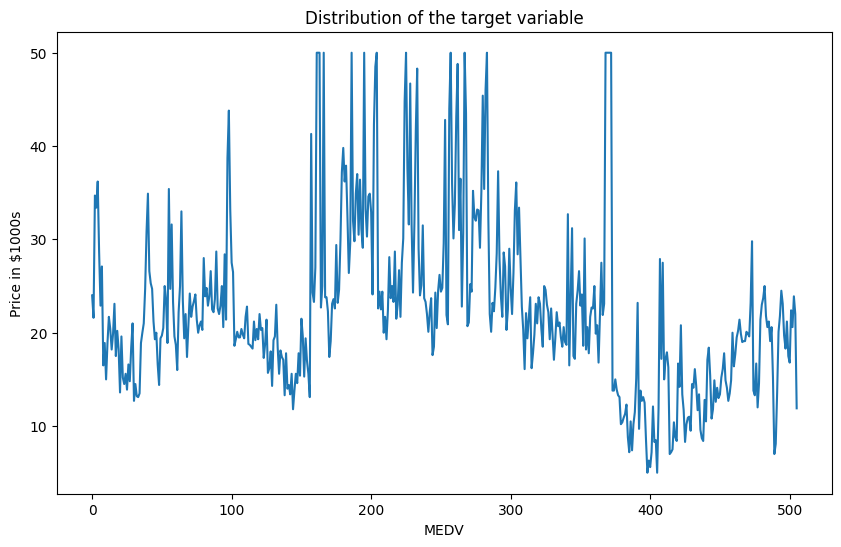

In [137]:
# plot the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.plot(data['MEDV'])
plt.xlabel('MEDV')
plt.ylabel('Price in $1000s')
plt.title('Distribution of the target variable')
plt.show()

In [138]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

# Implementing a model and using a pre-built model

We can either implement a linear regression model or use a pre-built model from the `sklearn` library. We will do both.
first, we will use the pre-built model from the `sklearn` library.

In [145]:
from sklearn.linear_model import LinearRegression as LR

sklearn_model = LR().fit(X_train, y_train)


predictions = sklearn_model.predict(X_test)
accuracy = sklearn_model.score(X_test, y_test)
print(f'The accuracy of the model is {accuracy}')
mse_error = np.sum(np.square(predictions - y_test)) / len(y_test)
print(f'The mean squared error of the model is {mse_error}')
mae_error = np.sum(np.abs(predictions - y_test)) / len(y_test)
print(f'The mean absolute error of the model is {mae_error}')

The accuracy of the model is 0.7204251482114874
The mean squared error of the model is 20.7460632081653
The mean absolute error of the model is 3.1896138503096263


Now, we will implement the linear regression model from scratch.

In [146]:
class LinearRegression:
    def __init__(self, X, y):
        self.weights = np.zeros(shape=(X.shape[1], 1))
        
    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        new_X = np.ones(shape=(X.shape[0], X.shape[1]+1))
        new_X[:, 1:] = X
        self.weights = np.linalg.inv(new_X.T @ new_X) @ new_X.T @ y
        
    def predict(self, X):
        X = np.array(X)
        new_X = np.ones(shape=(X.shape[0], X.shape[1]+1))
        new_X[:, 1:] = X
        return new_X @ self.weights
    
    def score(self, X, y):
        X, y = np.array(X), np.array(y)
        predictions = self.predict(X)
        return 1 - np.sum(np.square(predictions - y)) / np.sum(np.square(y - np.mean(y)))
        

Now, we use the `LinearRegression` class for training and testing.

In [147]:
model = LinearRegression(X_train, y_train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print(f'The accuracy of the model is {accuracy}')
mse_error = np.sum(np.square(predictions - y_test)) / len(y_test)
print(f'The mean squared error of the model is {mse_error}')
mae_error = np.sum(np.abs(predictions - y_test)) / len(y_test)
print(f'The mean absolute error of the model is {mae_error}')

The accuracy of the model is 0.7204251482115049
The mean squared error of the model is 20.746063208163996
The mean absolute error of the model is 3.189613850309545


# Comparing the models
Now, we will add the predictions of both models to the dataset and compare them.

In [143]:
data['sklearn predictions'] = sklearn_model.predict(X)
data['implemented model predictions'] = model.predict(X)

mean_diff = np.mean(np.abs(data['sklearn predictions'] - data['implemented model predictions']))
print(f'The mean difference between the predictions of the two models is {mean_diff}')

The mean difference between the predictions of the two models is 6.272014089471319e-13


In [144]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,sklearn predictions,implemented model predictions
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,30.024741,30.024741
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,24.597584,24.597584
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,30.616120,30.616120
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,28.738108,28.738108
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,27.873628,27.873628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,24.076577,24.076577
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,22.792945,22.792945
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,27.910501,27.910501
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,26.394462,26.394462


# Conclusion:
We have implemented a linear regression model from scratch and it has performed as well as the scikit-learn model since the mean difference between the predictions of both models is almost zero, and also the accuracy, mean squared error, and mean absolute error of both models are the same (We can conclude that the implementation of scikit-learn's linear regression model is similar to our implementation).